In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
np.random.seed(7)

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
markets = {
    1: df[df['Market'] == 1],
    2: df[df['Market'] == 2],
    3: df[df['Market'] == 3],
    4: df[df['Market'] == 4],

}
df.head()


,Index,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
0,0,1,1,363,0.002696,0.530040,0.400810,1.300048e-06,4.639533e-06,1.073594e-05,2.180516e-05,4.416943e-05,0.002212,6.214737e-07,200.000000,-0.000196,1.533780
1,1,1,1,1223,0.081093,1.366218,1.325157,1.656861e-05,3.024668e-05,5.261872e-05,4.193762e-05,4.193762e-05,0.010932,3.414868e-05,300.000000,-0.003798,0.843604
2,2,1,1,1372,0.009561,0.464871,0.328008,6.500872e-08,2.323204e-07,5.182686e-07,1.080834e-06,2.030442e-06,0.000306,4.079460e-08,159.692076,-0.000003,29.824024
3,3,1,1,1942,0.045300,0.608222,0.456662,1.928694e-08,6.495275e-08,1.338509e-07,2.644214e-07,6.980798e-07,0.000205,9.502066e-09,212.160378,-0.000008,100.388668
4,4,1,1,2712,0.001605,0.476718,0.205069,6.759866e-07,2.638783e-06,6.424519e-06,1.189923e-05,2.064450e-05,0.001525,3.428403e-07,153.724351,0.000065,5.950714


In [4]:
vals = markets[1].dropna().values
train_X = vals[:,2:15]
train_Y = vals[:,16]

print(np.count_nonzero(~np.isnan(train_X)), train_X.shape)
print(np.count_nonzero(~np.isnan(train_Y)), train_Y.shape)


1167972 (89844, 13)
89844 (89844,)


In [18]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import plot_model


model = Sequential()

model.add(Dense(units=128, activation='relu', input_shape=(13,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='relu'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])



In [19]:
history = model.fit(train_X, train_Y, epochs=2, batch_size=20)


Epoch 1/5
89844/89844 [==============================] - 7s 79us/step - loss: 432.4859 - acc: 0.0000e+00
Epoch 2/5
89844/89844 [==============================] - 7s 75us/step - loss: 432.4354 - acc: 0.0000e+00
Epoch 3/5
89844/89844 [==============================] - 6s 72us/step - loss: 432.4354 - acc: 0.0000e+00
Epoch 4/5
89844/89844 [==============================] - 7s 76us/step - loss: 432.4354 - acc: 0.0000e+00
Epoch 5/5
89844/89844 [==============================] - 7s 73us/step - loss: 432.4354 - acc: 0.0000e+00


dict_keys(['loss', 'acc'])


Text(0.5,1,'model accuracy')

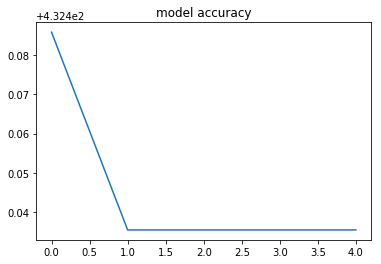

In [20]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'])
plt.title('model accuracy')